# CSE 252A Computer Vision I Fall 2018 - Assignment 4

### Instructor: David Kriegman
### Assignment Published On: Tuesday, November 27, 2018
### Due On: Friday, December 7, 2018 11:59 pm

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* Programming aspects of this assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you can do so. This has been provided just to provide you with a framework for the solution.
* You may use python packages for basic linear algebra (you can use numpy or scipy for basic operations), but you may not use packages that directly solve the problem.
* If you are unsure about using a specific package or function, then ask the instructor and teaching assistants for clarification.
* You must submit this notebook exported as a pdf. You must also submit this notebook as .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* **Late policy** - 10% per day late penalty after due date up to 3 days.

## Problem 1: Optical Flow [10 pts]

In this problem, the single scale Lucas-Kanade method for estimating optical flow will be implemented, and the data needed for this problem can be found in the folder 'optical_flow_images'.

An example optical flow output is shown below - this is not a solution, just an example output.

![title](optical_flow_images/sample_optical_flow_output.png)

### Part 1: Lucas-Kanade implementation [5 pts]

Implement the Lucas-Kanade method for estimating optical flow. The function 'LucasKanade' needs to be completed.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2

def grayscale(img):
    '''
    Converts RGB image to Grayscale
    '''
    gray=np.zeros((img.shape[0],img.shape[1]))
    gray=img[:,:,0]*0.2989+img[:,:,1]*0.5870+img[:,:,2]*0.1140
    return gray

def plot_optical_flow(img,U,V):
    '''
    Plots optical flow given U,V and one of the images
    '''
    
    # Change t if required, affects the number of arrows
    # t should be between 1 and min(U.shape[0],U.shape[1])
    t=10 
    
    # Subsample U and V to get visually pleasing output
    U1 = U[::t,::t]
    V1 = V[::t,::t]
    
    # Create meshgrid of subsampled coordinates
    r, c = img.shape[0],img.shape[1]
    cols,rows = np.meshgrid(np.linspace(0,c-1,c), np.linspace(0,r-1,r))
    cols = cols[::t,::t]
    rows = rows[::t,::t]
    
    # Plot optical flow
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.quiver(cols,rows,U1,V1)
    plt.show()

images=[]
for i in range(4):
    images.append(plt.imread('optical_flow_images/im'+str(i+1)+'.png'))

In [38]:
def LucasKanade(im1,im2,window):
    '''
    Inputs: the two images and window size
    Return U,V
    '''
    U = np.zeros(im1.shape)
    V = np.zeros(im1.shape)
    w = int(window/2 )
    im1 = im1 / 255. # normalize pixels
    im2 = im2 / 255. # normalize pixels
    
    #kernel_x = np.array([[-1., 1.], [-1., 1.]])  #kernel for x coordinate
    #kernel_y = np.array([[-1., -1.], [1., 1.]])  #kernel for y coordinate
    #Ix = conv2(im1, kernel_x, boundary='symm', mode='same')
    #Iy = conv2(im1, kernel_y, boundary='symm', mode='same')
    
    
    Ix,Iy = np.gradient(im1)
    Iy = -Iy
    It = im2 - im1

    # Implement Lucas Kanade    
    # for each point, calculate I_x, I_y, I_t
    # within window window_size * window_size
    for i in range(w, im1.shape[0]-w):
        for j in range(w, im1.shape[1]-w):
            Ix_sub = Ix[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy_sub = Iy[i-w:i+w+1, j-w:j+w+1].flatten()
            It_sub = It[i-w:i+w+1, j-w:j+w+1].flatten()
            b =  - np.array([(Ix_sub*It_sub).sum(),(Iy_sub*It_sub).sum()])
            M =  np.array([[(Ix_sub**2).sum(),(Ix_sub*Iy_sub).sum()],[(Ix_sub*Iy_sub).sum(),(Iy_sub**2).sum()]])
            v = np.linalg.pinv(M).dot(b)
            U[i,j]=v[0]
            V[i,j]=v[1]     
    return U,V   

### Part 2: Window size [2 pts]

Plot optical flow for the pair of images im1 and im2 for at least 3 different window sizes which leads to observable difference in the results. Comment on the effect of window size on results and justify.

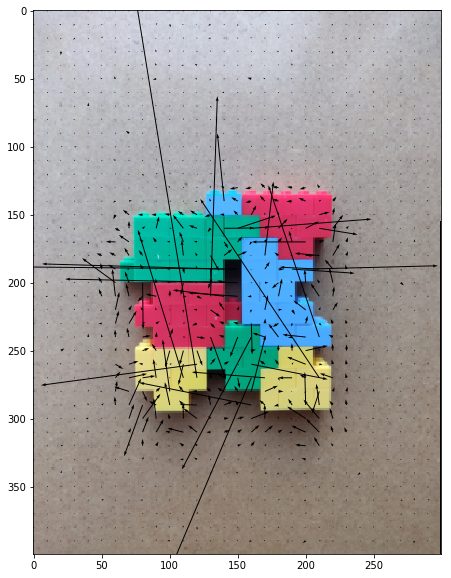

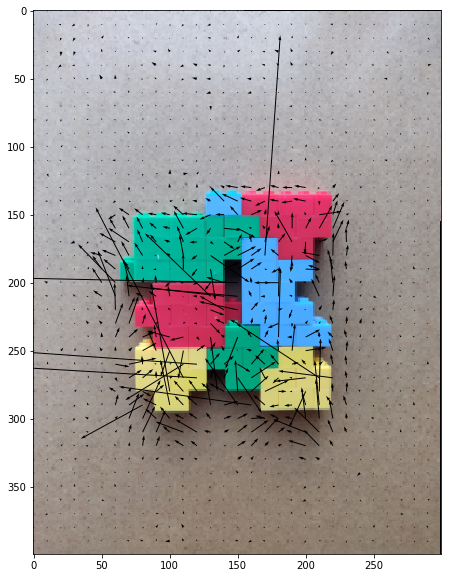

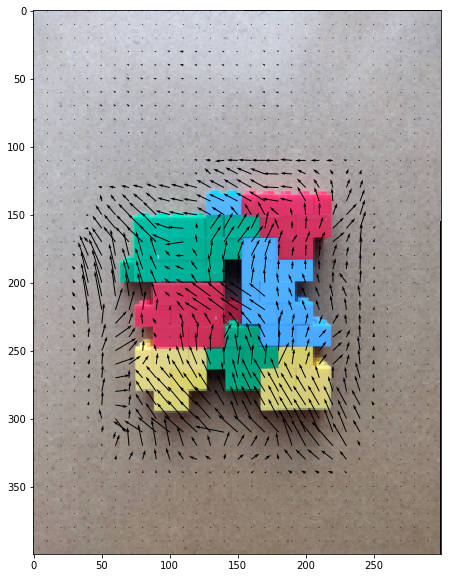

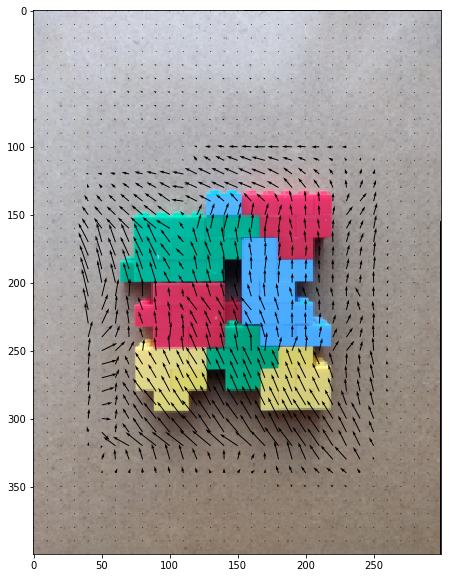

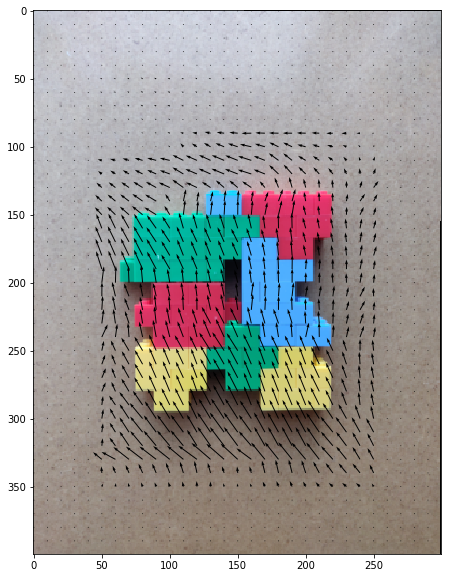

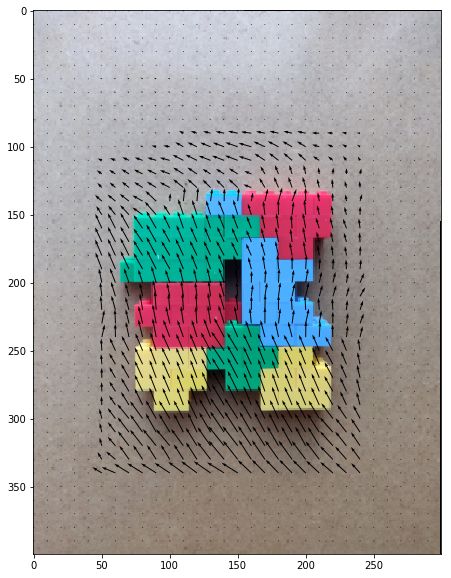

In [41]:
# Example code, change as required
window= [11,15,51,71,91,101] 
for w in window:
    U,V=LucasKanade(grayscale(images[0]),grayscale(images[1]),w)
    plot_optical_flow(images[0],U,V)

# Comment
The larger the windows size is, the clearer is the result image because for each time it consider more pixels so that it will prevent some of the noise.

### Part 3: All pairs [3 pts]

Find optical flow for the pairs (im1,im2), (im1,im3), (im1,im4) using a good window size. Does the optical flow result seem consistent with visual inspection? Comment on the type of motion indicated by results and visual inspection and explain why they might be consistent or inconsistent.

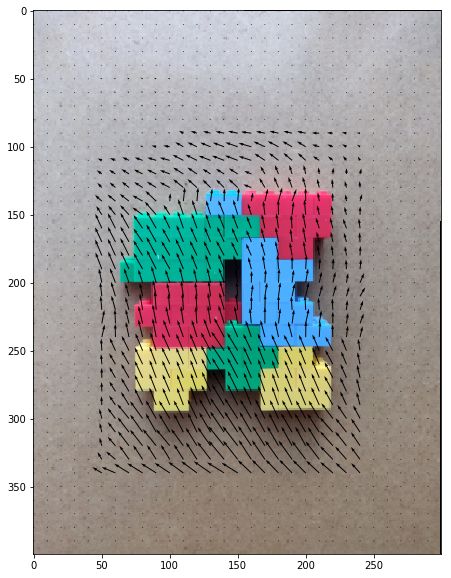

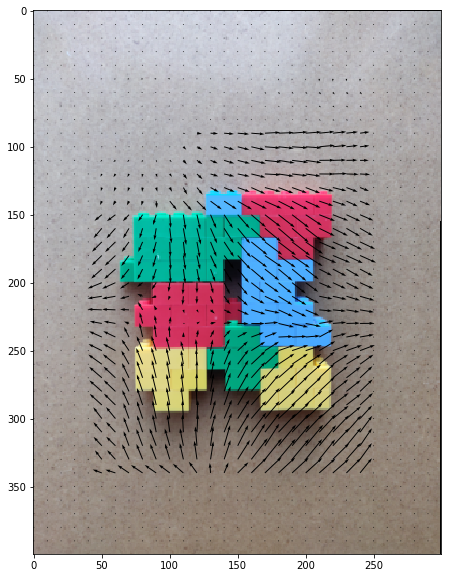

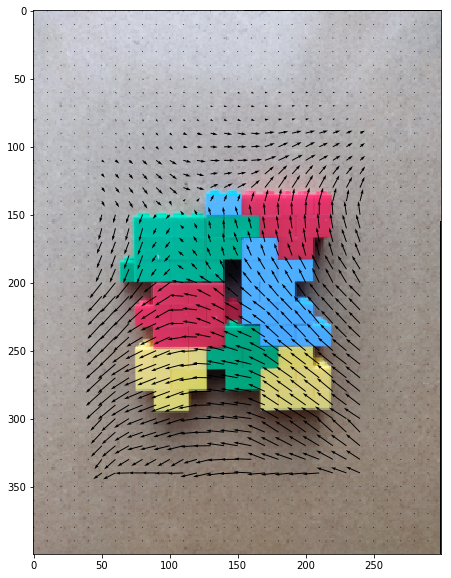

In [39]:
# Your code here
best_w = 101
U_1,V_1=LucasKanade(grayscale(images[0]),grayscale(images[1]),best_w)
plot_optical_flow(images[0],U_1,V_1)
U_2,V_2=LucasKanade(grayscale(images[0]),grayscale(images[2]),best_w)
plot_optical_flow(images[0],U_2,V_2)
U_3,V_3=LucasKanade(grayscale(images[0]),grayscale(images[3]),best_w)
plot_optical_flow(images[0],U_3,V_3)

## Comment
+ The pair from image1 to image2 is moving left and little bit up. Therefore, the optical flow arrows is pointing to the top-left direction.
+ The pair from image1 to image3 is rotating clockwise with a little angle. Therefore, the arrows in right top part of the toy points to the right-down direction and the left bottom part points to right-top direction.
+ The pair from image1 to image4 is zooming out according to my inspection but the result doesn't show it. The reason I guess is because of the noise of background.

## Problem 2: Machine Learning [12 pts]

In this problem, you will implement several machine learning solutions for computer vision problems.

### Part 1: Initial setup [1 pts]

Follow the directions on https://www.tensorflow.org/install/ to install Tensorflow on your computer.
If you are using the Anaconda distribution for python, you can check out https://www.anaconda.com/blog/developer-blog/tensorflow-in-anaconda/.

Note: You will not need GPU support for this assignment so don't worry if you don't have one. Furthermore, installing with GPU support is often more difficult to configure so it is suggested that you install the CPU only version.

Run the tensorflow hello world snippet below to verify your instalation.

Download the MNIST data from http://yann.lecun.com/exdb/mnist/.

Download the 4 zipped files, extract them into one folder, and change the variable 'path' in the code below. (Code taken from https://gist.github.com/akesling/5358964 )

Plot one random example image corresponding to each label from training data.

In [4]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


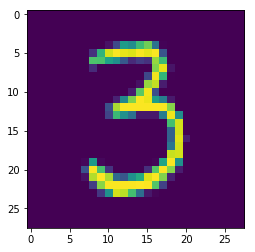

In [18]:
import os
import struct

# Change path as required
path = "./mnist_data/"

def read(dataset = "training", datatype='images'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    if(datatype=='images'):
        get_data = lambda idx: img[idx]
    elif(datatype=='labels'):
        get_data = lambda idx: lbl[idx]

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_data(i)
        
trainData=np.array(list(read('training','images')))
trainLabels=np.array(list(read('training','labels')))
testData=np.array(list(read('testing','images')))
testLabels=np.array(list(read('testing','labels')))

#plot one example from the training data
plt.imshow(trainData[50,:,:])
plt.show()

Some helper functions are given below.

In [9]:
# a generator for batches of data
# yields data (batchsize, 3, 32, 32) and labels (batchsize)
# if shuffle, it will load batches in a random order
def DataBatch(data, label, batchsize, shuffle=True):
    n = data.shape[0]
    if shuffle:
        index = np.random.permutation(n)
    else:
        index = np.arange(n)
    for i in range(int(np.ceil(n/batchsize))):
        inds = index[i*batchsize : min(n,(i+1)*batchsize)]
        yield data[inds], label[inds]

# tests the accuracy of a classifier
def test(testData, testLabels, classifier):
    batchsize=50
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize,shuffle=False):
        prediction = classifier(data)
        correct += np.sum(prediction==label)
    return correct/testData.shape[0]*100

# a sample classifier
# given an input it outputs a random class
class RandomClassifier():
    def __init__(self, classes=10):
        self.classes=classes
    def __call__(self, x):
        x = x.reshape((-1,x.shape[1]*x.shape[2]))
        return np.random.randint(self.classes, size=x.shape[0])

randomClassifier = RandomClassifier()
print('Random classifier accuracy: %f' % 
      test(testData, testLabels, randomClassifier))

Random classifier accuracy: 9.940000


### Part 2: Confusion Matrix [2 pts]
Here you will implement a function that computes the confusion matrix for a classifier.
The matrix (M) should be nxn where n is the number of classes.
Entry M[i,j] should contain the fraction of images of class i that was classified as class j.

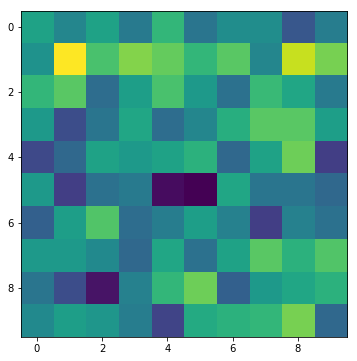

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


In [12]:
# Using the tqdm module to visualize run time is suggested
# from tqdm import tqdm

# It would be a good idea to return the accuracy, along with the confusion 
# matrix, since both can be calculated in one iteration over test data, to 
# save time
def Confusion(testData, testLabels, classifier):
    M = np.zeros((10,10))
    pred = classifier(testData)
    for index in range(testData.shape[0]): 
        M[testLabels[index],pred[index]] += 1        
    M /= testData.shape[0]    
    return M

def VisualizeConfusion(M):
    plt.figure(figsize=(14, 6))
    plt.imshow(M)
    plt.show()
    print(np.round(M,2))

M = Confusion(testData, testLabels, randomClassifier)
VisualizeConfusion(M)

### Part 3: K-Nearest Neighbors (KNN) [4 pts]

* Here you will implement a simple knn classifier. The distance metric is Euclidean in pixel space. k refers to the number of neighbors involved in voting on the class, and should be 3. You are allowed to use sklearn.neighbors.KNeighborsClassifier.
* Display confusion matrix and accuracy for your KNN classifier trained on the entire train set. (should be ~97 %)
* After evaluating the classifier on the testset, based on the confusion matrix, mention the number that the number '4' is most often predicted to be, other than '4'.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
class KNNClassifer():
    def __init__(self, k=3):
        # k is the number of neighbors involved in voting
        '''
        your code here
        '''
        self.classifier = KNeighborsClassifier(n_neighbors=k)        
        
    def train(self, trainData, trainLabels):
        trainData = trainData.reshape((-1,trainData.shape[1]*trainData.shape[2]))
        self.classifier.fit(trainData, trainLabels) 
        
    def __call__(self, x):
        # this method should take a batch of images
        # and return a batch of predictions
        x = x.reshape((-1,x.shape[1]*x.shape[2]))
        return self.classifier.predict(x)


# test your classifier with only the first 100 training examples (use this
# while debugging)
# note you should get ~ 65 % accuracy
knnClassiferX = KNNClassifer()
knnClassiferX.train(trainData[:100], trainLabels[:100])
print ('KNN classifier accuracy: %f'%test(testData, testLabels, knnClassiferX))

KNN classifier accuracy: 64.760000


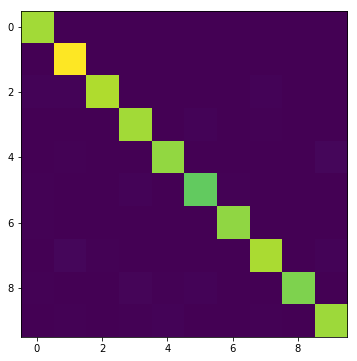

[[0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.1  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.09 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.09 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.1  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1 ]]


In [14]:
# test your classifier with all the training examples (This may take a while)
knnClassifer = KNNClassifer()
knnClassifer.train(trainData, trainLabels)

# display confusion matrix for your KNN classifier with all the training examples
M_knn = Confusion(testData, testLabels, knnClassifer)
VisualizeConfusion(M_knn)

In [17]:
print ('KNN classifier accuracy: %f'%test(testData, testLabels, knnClassifer))

KNN classifier accuracy: 97.050000


## Comment
By observing the confusion matrix, the number are second most likely to be predicted as number 4 is number 9.

### Part 4: Principal Component Analysis (PCA) K-Nearest Neighbors (KNN) [5 pts]
Here you will implement a simple KNN classifer in PCA space (for k=3 and 25 principal components).
You should implement PCA yourself using svd (you may not use sklearn.decomposition.PCA
or any other package that directly implements PCA transformations

Is the testing time for PCA KNN classifier more or less than that for KNN classifier? Comment on why it differs if it does.

In [23]:
class PCAKNNClassifer():
    def __init__(self, components=25, k=3):
        # components = number of principal components
        # k is the number of neighbors involved in voting
        self.classifier = KNeighborsClassifier(n_neighbors=k)
        self.compo = components
        
    def train(self, trainData, trainLabels):
        '''
        your code here
        '''
        
        #pca
        trainData = trainData.reshape((-1,trainData.shape[1]*trainData.shape[2]))
        m,n = np.shape(trainData)
        mu = np.mean(trainData, 0)                         #order in row
        avg = np.tile(mu,(m,1))
        trainData = trainData - avg
        cov_Mat = np.dot(trainData.T, trainData)/m
        u,d,v = np.linalg.svd(cov_Mat)
        data_trans = np.dot(trainData, u[:,:self.compo])   #transformed data
        
        self.transform_m = u[:,:self.compo]                #store transform matrix 
        
        #train classfier
        self.classifier.fit(data_trans, trainLabels)        
        
        
    def __call__(self, x):
        x = x.reshape((-1,x.shape[1]*x.shape[2]))
        x_trans = np.dot(x, self.transform_m)
        return self.classifier.predict(x_trans)

# test your classifier with only the first 100 training examples (use this
# while debugging)
pcaknnClassiferX = PCAKNNClassifer()
pcaknnClassiferX.train(trainData[:100], trainLabels[:100])
print ('PCAKNN classifier accuracy: %f'%test(testData, testLabels, knnClassiferX))

PCAKNN classifier accuracy: 64.760000


now is testcase:0
now is testcase:1000
now is testcase:2000
now is testcase:3000
now is testcase:4000
now is testcase:5000
now is testcase:6000
now is testcase:7000
now is testcase:8000
now is testcase:9000


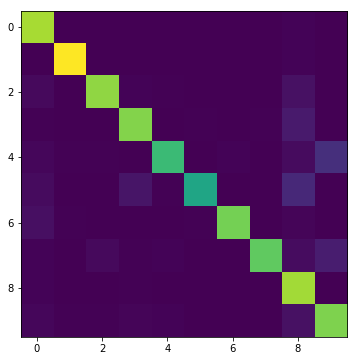

[[0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.09 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.09 0.   0.   0.   0.   0.01 0.  ]
 [0.   0.   0.   0.   0.08 0.   0.   0.   0.   0.01]
 [0.   0.   0.   0.01 0.   0.07 0.   0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.09 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.08 0.   0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.09]]
PCAKNN classifier accuracy: 88.800000


In [111]:
# test your classifier with all the training examples (This may take a while)
pcaknnClassifer = PCAKNNClassifer()
pcaknnClassifer.train(trainData, trainLabels)

# display confusion matrix for your PCA KNN classifier with all the training examples
M_pcaknn = Confusion(testData, testLabels, pcaknnClassifer)
VisualizeConfusion(M_pcaknn)

#display accuracy
print ('PCAKNN classifier accuracy: %f'%test(testData, testLabels, pcaknnClassifer))

## Comment
It's faster for PCAKNN than executing normal PCA because the feature dimension is largely reduced.

## Problem 3: Deep learning [12 pts]
Below is some helper code to train your deep networks. You can look at https://www.tensorflow.org/get_started/mnist/beginners for reference.

In [25]:
# base class for your Tensorflow networks. It implements the training loop
# (train) and prediction(__call__)  for you.
# You will need to implement the __init__ function to define the networks
# structures in the following problems.

class TFClassifier():
    def __init__(self):
        self.x  = None
        self.y  = None
        self.y_ = None        
    
    def train(self, trainData, trainLabels, epochs=1, batchsize=50):
        self.test = tf.Variable(1)
        self.prediction = tf.argmax(self.y,1)
        self.cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=self.y_, 
                                                                                           logits=self.y))
        self.train_step = tf.train.AdamOptimizer(1e-4).minimize(self.cross_entropy)
        self.correct_prediction = tf.equal(self.prediction, self.y_)
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        self.sess.run(tf.global_variables_initializer())            
        
        for epoch in range(epochs):
            for i, (data,label) in enumerate(DataBatch(trainData, trainLabels, batchsize, shuffle=True)):
                data=np.expand_dims(data,-1)
                _, acc = self.sess.run([self.train_step, self.accuracy], feed_dict={self.x: data, self.y_: label})

                
            print ('Epoch:%d Accuracy: %f'%(epoch+1, test(testData, testLabels, self)))
                                
            
    def __call__(self, x):
        return self.sess.run(self.prediction, feed_dict={self.x: np.expand_dims(x,-1)})
    
    def get_first_layer_weights(self):
        return self.sess.run(self.weights[0])


# helper function to get weight variable
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

# helper function to get bias variable
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# example linear classifier
class LinearClassifier(TFClassifier):
    def __init__(self, classes=10):
        self.sess = tf.Session()

        self.x = tf.placeholder(tf.float32, shape=[None,28,28,1]) # input batch of images
        self.y_ = tf.placeholder(tf.int64, shape=[None]) # input labels

        # model variables
        self.weights = [weight_variable([28*28,classes])]   #Single layer so it should be one elem
        self.biases = [bias_variable([classes])]
        # linear operation
        self.y = tf.matmul(tf.reshape(self.x,(-1,28*28*1)),self.weights[0]) + self.biases[0]
        

# test the example linear classifier (note you should get around 90% accuracy
# for 10 epochs and batchsize 50)
linearClassifier = LinearClassifier()
linearClassifier.train(trainData, trainLabels, epochs=10)

Epoch:1 Accuracy: 88.630000
Epoch:2 Accuracy: 89.370000
Epoch:3 Accuracy: 89.990000
Epoch:4 Accuracy: 89.730000
Epoch:5 Accuracy: 91.230000
Epoch:6 Accuracy: 90.370000
Epoch:7 Accuracy: 90.290000
Epoch:8 Accuracy: 90.060000
Epoch:9 Accuracy: 90.580000
Epoch:10 Accuracy: 88.470000


### Part 1: Single Layer Perceptron [2 pts]
The simple linear classifier implemented in the cell already performs quite well. Plot the filter weights corresponding to each output class (weights, not biases) as images. (Normalize weights to lie between 0 and 1 and use color maps like 'inferno' or 'plasma' for good results). Comment on what the weights look like and why that may be so.


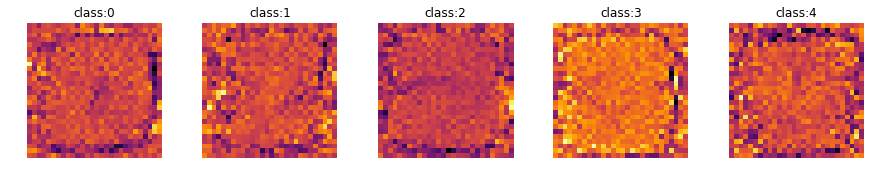

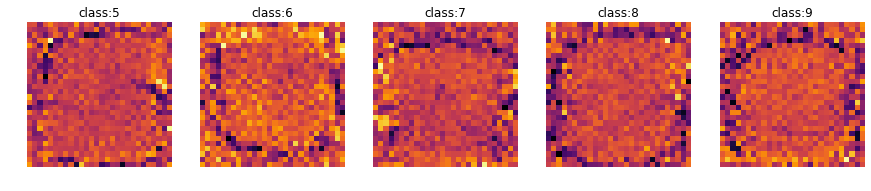

In [77]:
weights = linearClassifier.sess.run(linearClassifier.weights[0])
weights = (weights - weights.flatten().min())/(weights.flatten().max() - weights.flatten().min())              
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.3, hspace =0)
for classindex in range(5):
    classmap = weights[:,classindex]
    classmap = classmap.reshape((28,28))        
    ax = plt.subplot(1,5,classindex+1)
    plt.axis("off")
    ax.set_title("class:{}".format(classindex))
    plt.imshow(classmap,cmap="inferno")

plt.show()
plt.figure(figsize=(15,15))
for classindex in range(5,10):
    classmap = weights[:,classindex]
    classmap = classmap.reshape((28,28))        
    ax = plt.subplot(1,5,classindex+1-5)
    plt.axis("off")
    ax.set_title("class:{}".format(classindex))
    plt.imshow(classmap,cmap="inferno")
plt.show()

## Comment
The map of weight looks like the number for corresponding class. Since each weight matrix we plot is from the input feature nodes connected to one class, which means the weight value will be lager when it effects determining this class and it will be smaller when it doesn't lead to the class number. Therefore, after reshaping the weight vector into a size as same as the original image, the heatmap seems to be similar to the shape of the number.

### Part 2: Multi Layer Perceptron (MLP) [5 pts]
Here you will implement an MLP. The MLP shoud consist of 2 layers (matrix multiplication and bias offset) that map to the following feature dimensions:

* 28x28 -> hidden (100)
* hidden -> classes

* The hidden layer should be followed with a ReLU nonlinearity. The final layer should not have a nonlinearity applied as we desire the raw logits output.
* The final output of the computation graph should be stored in self.y as that will be used in the training.

Display the confusion matrix and accuracy after training. Note: You should get ~ 97 % accuracy for 10 epochs and batch size 50.

Plot the filter weights corresponding to the mapping from the inputs to the first 10 hidden layer outputs (out of 100). Do the weights look similar to the weights plotted in the previous problem? Why or why not?

Epoch:1 Accuracy: 95.160000
Epoch:2 Accuracy: 96.560000
Epoch:3 Accuracy: 97.250000
Epoch:4 Accuracy: 97.340000
Epoch:5 Accuracy: 97.330000
Epoch:6 Accuracy: 97.280000
Epoch:7 Accuracy: 97.600000
Epoch:8 Accuracy: 97.760000
Epoch:9 Accuracy: 97.640000
Epoch:10 Accuracy: 97.830000
MLP classifier accuracy: 97.83%


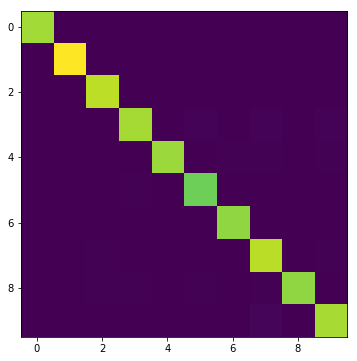

[[0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.1  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.09 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.09 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.1  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1 ]]


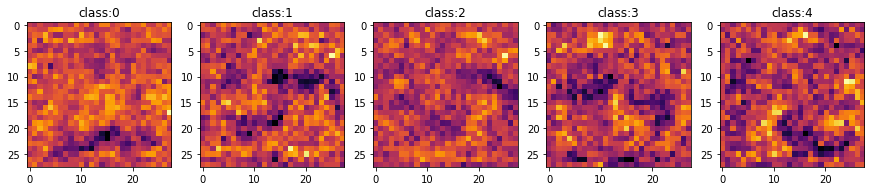

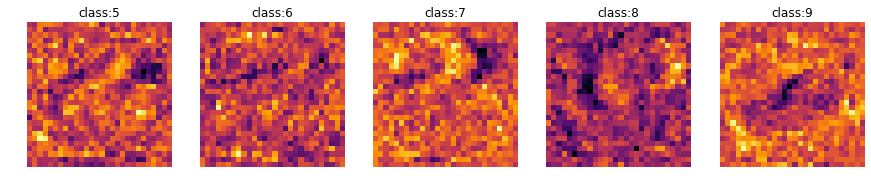

In [80]:
class MLPClassifer(TFClassifier):
    def __init__(self, classes=10, hidden=100):
        self.sess = tf.Session()
        self.x = tf.placeholder(tf.float32, shape=[None,28,28,1]) # input batch of images
        self.y_ = tf.placeholder(tf.int64, shape=[None]) # input labels
        
        # two layers
        #pixel -> hidden & hidden -> classes        
        self.weights = [weight_variable([28*28,hidden]),weight_variable([hidden,classes])]
        self.biases = [bias_variable([hidden]),bias_variable([classes])]
        
        # linear operation
        self.hidden_out = tf.nn.relu(tf.matmul(tf.reshape(self.x,(-1,28*28*1)),self.weights[0]) + self.biases[0])
        self.y = tf.matmul(self.hidden_out,self.weights[1]) + self.biases[1]        
        
mlpClassifer = MLPClassifer()
mlpClassifer.train(trainData, trainLabels, epochs=10)

"""show acc"""
print ('MLP classifier accuracy: {}%'.format(test(testData, testLabels,mlpClassifer)))

"""show Confusion Matrix"""
M = Confusion(testData, testLabels, mlpClassifer)
VisualizeConfusion(M)

"""Display weight map"""
weights_mlp =  mlpClassifer.sess.run(mlpClassifer.weights[0])
weights_mlp = (weights_mlp - weights_mlp.flatten().min())/(weights_mlp.flatten().max() - weights_mlp.flatten().min())
plt.figure(figsize=(15,15))
for classindex in range(5):
    classmap_mlp = weights_mlp[:, classindex]
    classmap_mlp = classmap_mlp.reshape((28,28))    
    ax = plt.subplot(1,5,classindex+1)
    ax.set_title("class:{}".format(classindex))
    plt.imshow(classmap_mlp,cmap="inferno")
plt.show()

plt.figure(figsize=(15,15))
for classindex in range(5,10):
    classmap_mlp = weights_mlp[:, classindex]
    classmap_mlp = classmap_mlp.reshape((28,28))    
    ax = plt.subplot(1,5,classindex+1-5)
    plt.axis("off")
    ax.set_title("class:{}".format(classindex))
    plt.imshow(classmap_mlp,cmap="inferno")
plt.show() 

## Comment
The heatmaps are not similar to the previous result because the weight displayed is not connected to the output layer directly. Therefore, we can't tell the shape from the heatmaps in this part.

### Part 3: Convolutional Neural Network (CNN) [5 pts]
Here you will implement a CNN with the following architecture:

* n=5
* ReLU( Conv(kernel_size=4x4, stride=2, output_features=n) )
* ReLU( Conv(kernel_size=4x4, stride=2, output_features=n*2) )
* ReLU( Conv(kernel_size=4x4, stride=2, output_features=n*4) )
* Linear(output_features=classes)

Display the confusion matrix and accuracy after training. You should get around ~ 98 % accuracy for 10 epochs and batch size 50.

Epoch:1 Accuracy: 92.560000
Epoch:2 Accuracy: 95.030000
Epoch:3 Accuracy: 95.950000
Epoch:4 Accuracy: 96.710000
Epoch:5 Accuracy: 97.110000
Epoch:6 Accuracy: 97.250000
Epoch:7 Accuracy: 97.560000
Epoch:8 Accuracy: 97.810000
Epoch:9 Accuracy: 97.910000
Epoch:10 Accuracy: 98.220000
CNN classifier accuracy: 98.220000


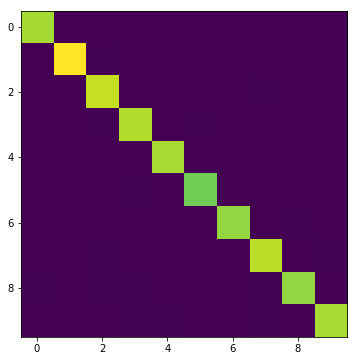

[[0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.1  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.09 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.09 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.1  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1 ]]


In [50]:
def conv2d(x, W, stride=2):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')

class CNNClassifer(TFClassifier):
    def __init__(self, classes=10, n=5):
        
        self.sess = tf.Session()
        self.x = tf.placeholder(tf.float32, shape=[None,28,28,1]) # input batch of images
        self.y_ = tf.placeholder(tf.int64, shape=[None]) # input labels
        
        # three conv and one linear layer        
        # parameters: filter_height, filter_width, in_channels, out_channels
        self.weights = [weight_variable([4,4,1,n]),
                        weight_variable([4,4,n,n*2]),
                        weight_variable([4,4,n*2,n*4]),
                        weight_variable([4*4*n*4,classes])]
        self.biases = [bias_variable([classes])]
        
        # conv operations
        self.conv1 = tf.nn.relu(conv2d(self.x,self.weights[0]))
        self.conv2 = tf.nn.relu(conv2d(self.conv1,self.weights[1]))
        self.conv3 = tf.nn.relu(conv2d(self.conv2,self.weights[2]))
        self.y = tf.matmul(tf.reshape(self.conv3,[-1,4*4*n*4]),self.weights[3]) + self.biases[0]

cnnClassifer = CNNClassifer()
cnnClassifer.train(trainData, trainLabels, epochs=10)

print ('CNN classifier accuracy: %f'%test(testData, testLabels, cnnClassifer))

"""show Confusion Matrix"""
M_cnn = Confusion(testData, testLabels, cnnClassifer)
VisualizeConfusion(M_cnn)

* Note that the MLP/ConvNet approaches lead to an accuracy a little higher than the K-NN approach. 
* In general, Neural net approaches lead to significant increase in accuracy, but in this case since the problem is not too hard, the increase in accuracy is not very high.
* However, this is still quite significant considering the fact that the ConvNets we've used are relatively simple while the accuracy achieved using K-NN is with a search over 60,000 training images for every test image.
* You can look at the performance of various machine learning methods on this problem at http://yann.lecun.com/exdb/mnist/
* You can learn more about neural nets/ tensorflow at https://www.tensorflow.org/tutorials/
* You can play with a demo of neural network created by Daniel Smilkov and Shan Carter at https://playground.tensorflow.org/